In [42]:
# Import the libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('netflix_titles.csv')
print("Column Headings:")       # To verify if the data is loading correctly
print(df.head())

print('\n, Headings: ', "\t", df.columns)

Column Headings:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September

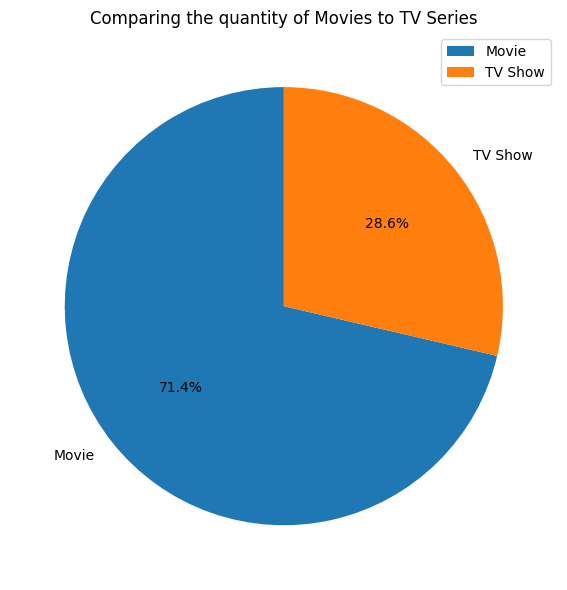

In [43]:
# Data Cleaning

df = df.dropna(subset = ['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(type_counts.values, labels = type_counts.index, autopct = '%1.1f%%', startangle = 90)     
plt.title("Comparing the quantity of Movies to TV Series")
plt.tight_layout()
plt.legend()
plt.savefig('movies_vs_tvshows.png')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19372\2432188155.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


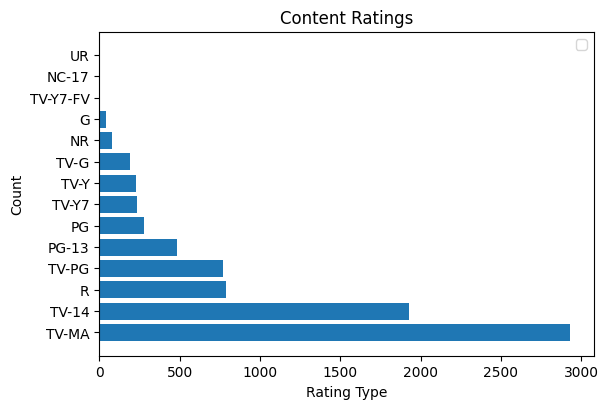

In [44]:
# Bar Chart for Rating

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(6,4))
plt.barh(rating_counts.index, rating_counts.values)
plt.title("Content Ratings")
plt.tight_layout()
plt.xlabel('Rating Type')
plt.ylabel('Count')
plt.legend()
plt.savefig('content_ratings.png')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19372\679094700.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


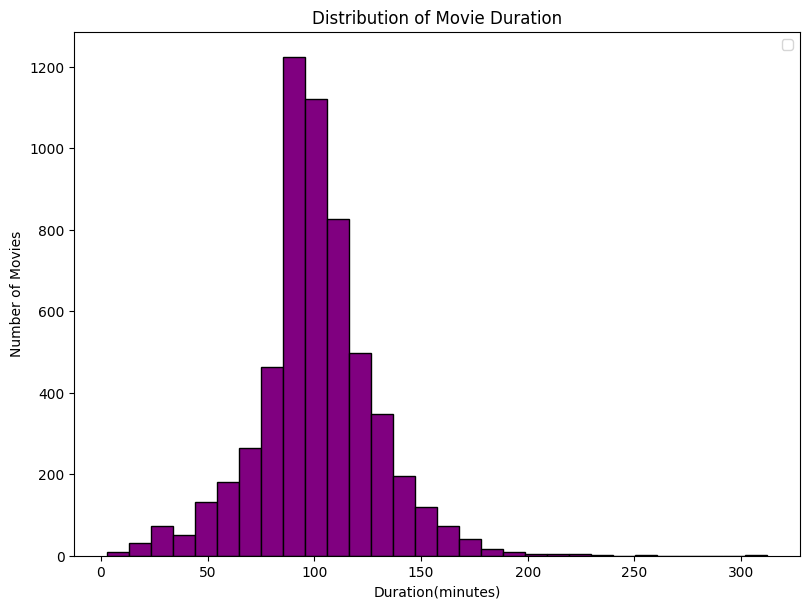

In [45]:
#Histograms for movie duration distribution

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins =30, color = 'purple', edgecolor = 'black')
plt.title("Distribution of Movie Duration")
plt.tight_layout()
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Movies')
plt.legend()
plt.savefig('movies_duration.png')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19372\1425005832.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


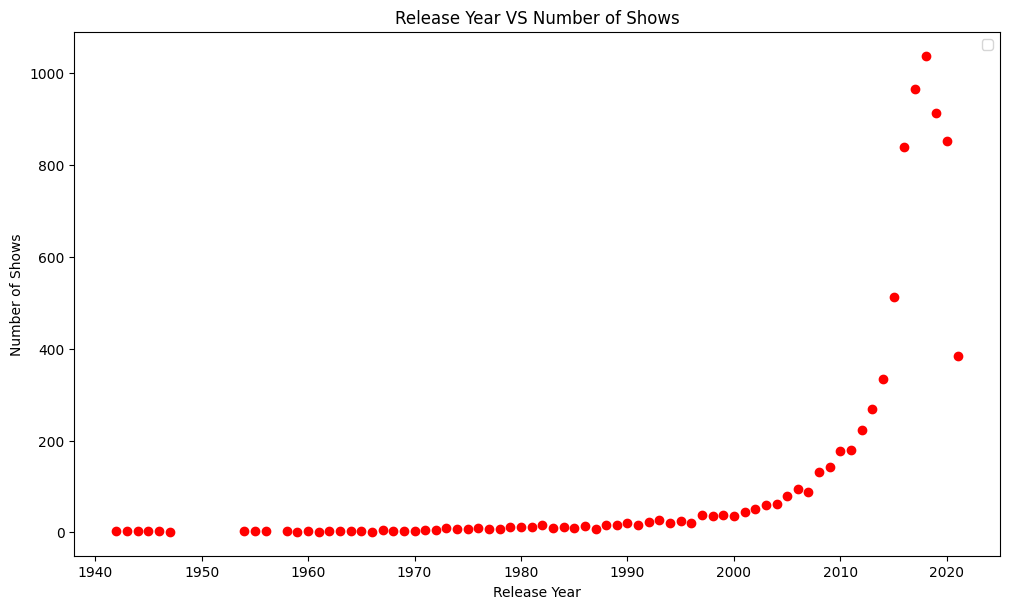

In [46]:
#Scatter Plot
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color = 'red')
plt.title("Release Year VS Number of Shows")
plt.tight_layout()
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.legend()
plt.savefig('release_year.png')
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_19372\1756615091.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


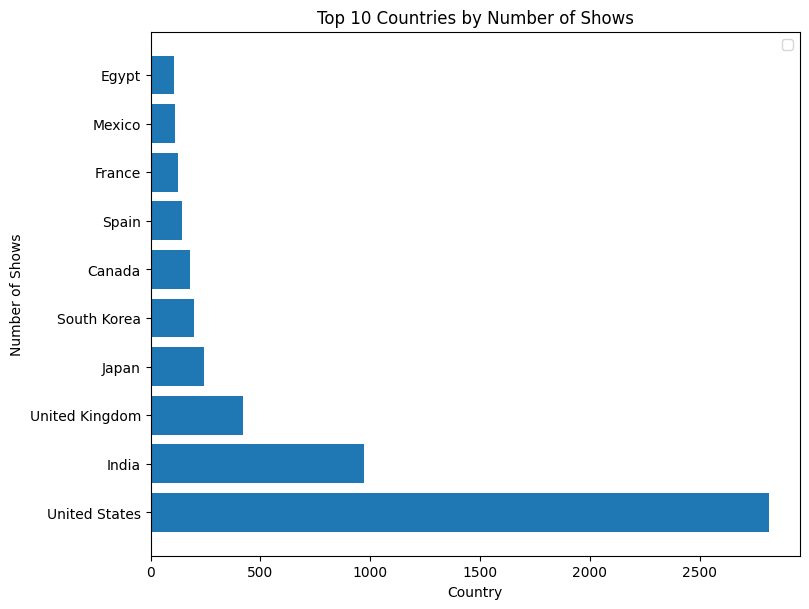

In [59]:
# Top 10 COuntries for producing movies

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index, country_counts.values)
plt.title("Top 10 Countries by Number of Shows")
plt.tight_layout()
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.legend()
plt.savefig('top10_coiuntries.png')
plt.show()

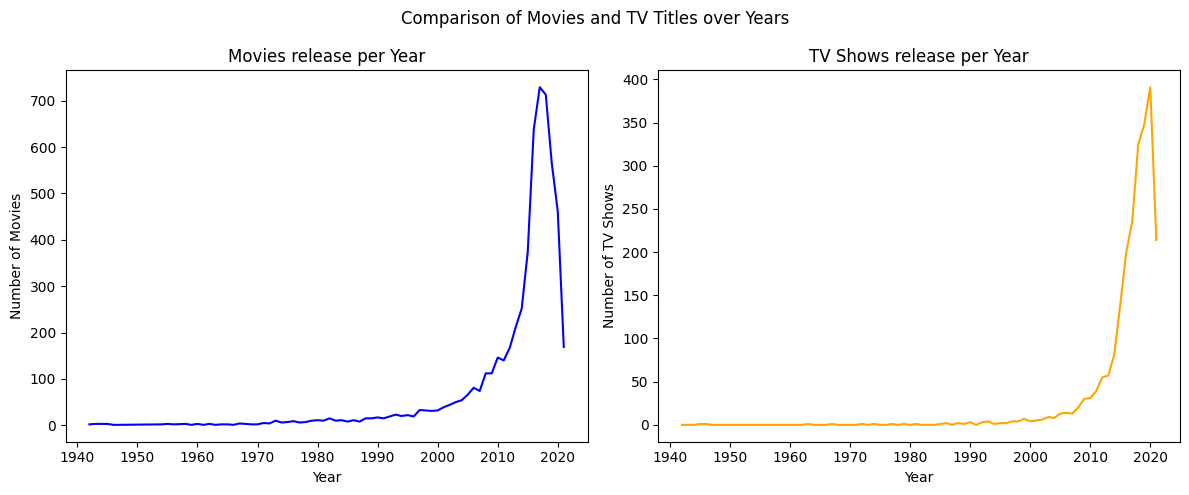

In [60]:
#Content by Year

cy = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

# first subplot: Movies
ax[0].plot(cy.index, cy['Movie'], color = 'blue')
ax[0].set_title('Movies release per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# second subplot: TV Shows
ax[1].plot(cy.index, cy['TV Show'], color = 'orange')
ax[1].set_title('TV Shows release per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Titles over Years')

plt.tight_layout()
plt.savefig('movies_tvshows_comparison.png')

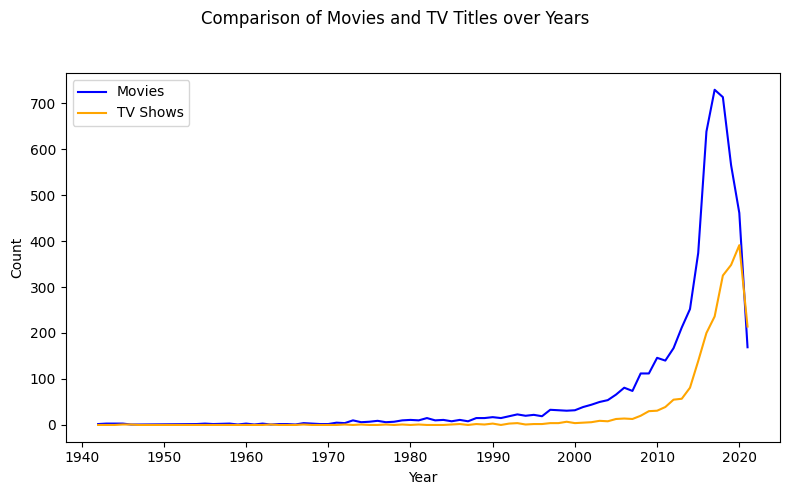

In [62]:
# Better comparison of movies & TV Shows Release per year

cy = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(cy.index, cy['Movie'], color='blue', label='Movies')
ax.plot(cy.index, cy['TV Show'], color='orange', label='TV Shows')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend()

fig.suptitle('Comparison of Movies and TV Titles over Years')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('movies_tvshows_contrast.png')
plt.show()
